In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
data = pd.read_csv("train.csv", index_col="Id")

Посмотрим на наши данные

In [19]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Категориальные данные закодированы через OHE, вернем их обратно для удобства анализа

In [20]:
#Function to revert pd.get_dummies
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [21]:
cat_data = undummify(data.iloc[:, 10:-1])
target = data.Cover_Type
num_data = data.iloc[:, :10]
data = pd.concat([num_data, cat_data, target], axis=1)

In [22]:
Wilderness = {"Area1": "Rawah", "Area2": "Neota", "Area3": "Comanche Peak", "Area4": "Cache la Poudre"}
data['Wilderness'] = data['Wilderness'].map(Wilderness)

In [23]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness,Soil,Cover_Type
Id,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,Rawah,Type29,5
2,2590,56,2,212,-6,390,220,235,151,6225,Rawah,Type29,5
3,2804,139,9,268,65,3180,234,238,135,6121,Rawah,Type12,2
4,2785,155,18,242,118,3090,238,238,122,6211,Rawah,Type30,2
5,2595,45,2,153,-1,391,220,234,150,6172,Rawah,Type29,5


Разделим столбцы на числовые, категориальные и целевую переменную

In [24]:
num_cols = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
            "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
           "Horizontal_Distance_To_Fire_Points"]
cat_cols = ["Wilderness", "Soil"]
target_col = ["Cover_Type"]

Посчитаем кол-во дубликатов и пропусков

In [25]:
data.duplicated().sum()

0

In [26]:
data.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness                            0
Soil                                  0
Cover_Type                            0
dtype: int64

Выведем общую статистику

In [27]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,7.000000


Посмотрим на распределение числовых переменных

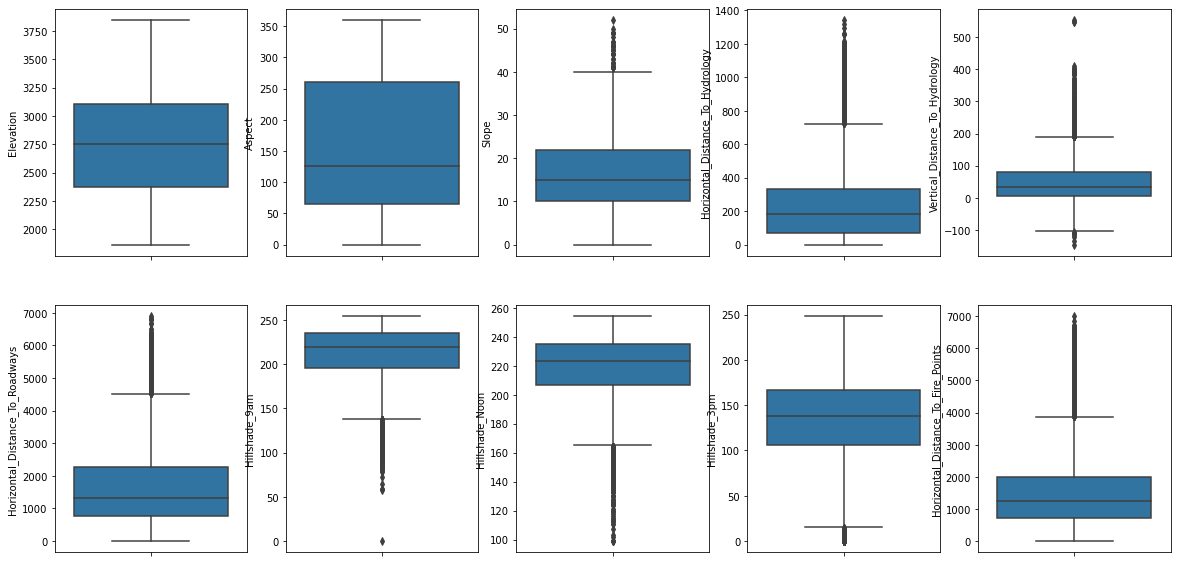

In [28]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i, col in enumerate(num_cols):
    sns.boxplot(ax=axs[i // 5][i % 5], y=data[col])
    axs[i // 5][i % 5].set_ylabel(f"{col}")    

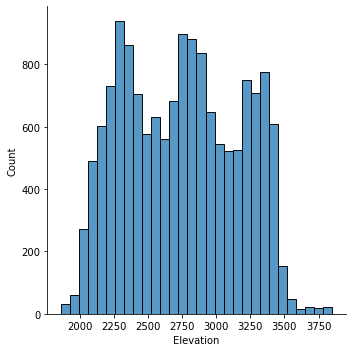

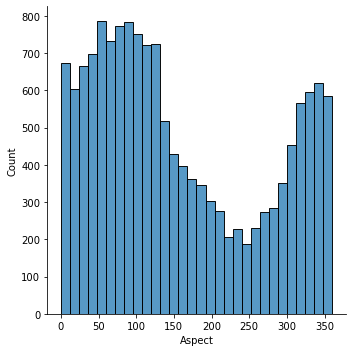

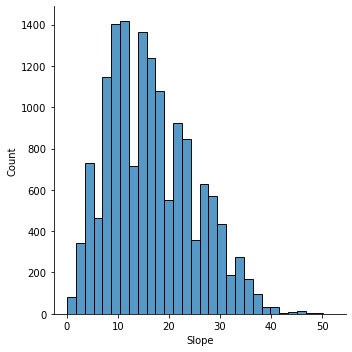

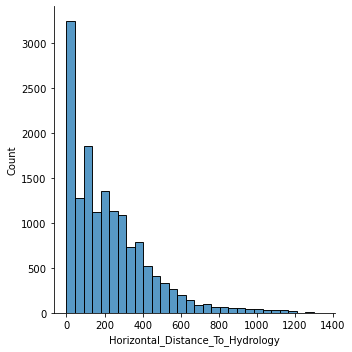

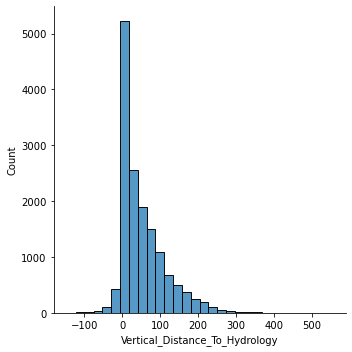

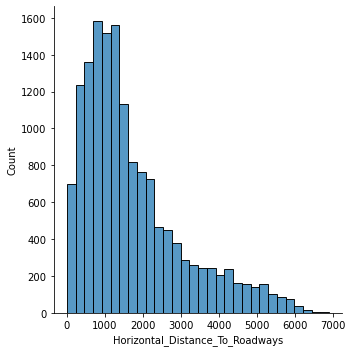

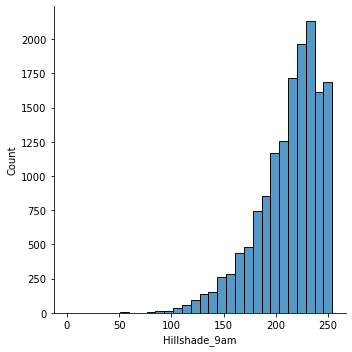

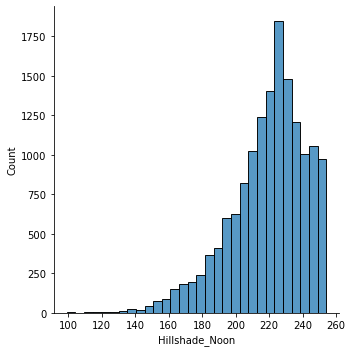

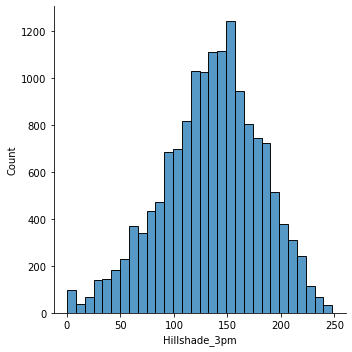

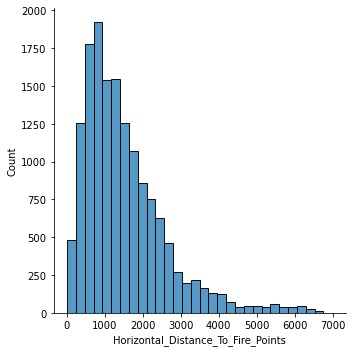

In [29]:
for col in num_cols:
    sns.displot(data[col], bins=30)

Распределение по категориальным переменным

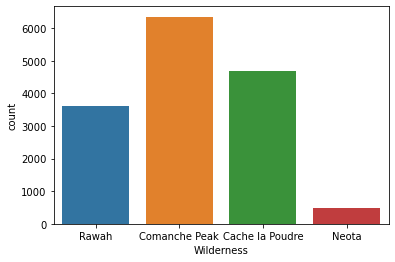

In [30]:
sns.countplot(x=data["Wilderness"]); #распределение по Wilderness

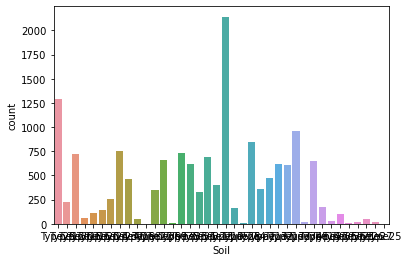

In [31]:
sns.countplot(x=data["Soil"]); #распределение по Soil

In [32]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

Wilderness DISTRIBUTION
Comanche Peak      6349
Cache la Poudre    4675
Rawah              3597
Neota               499
Name: Wilderness, dtype: int64

Soil DISTRIBUTION
Type10    2142
Type29    1291
Type3      962
Type4      843
Type23     757
Type38     728
Type30     725
Type32     690
Type39     657
Type6      650
Type2      623
Type33     616
Type17     612
Type13     476
Type40     459
Type11     406
Type1      355
Type22     345
Type31     332
Type24     257
Type12     227
Type14     169
Type5      165
Type20     139
Type16     114
Type35     102
Type18      60
Type26      54
Type19      46
Type37      34
Type34      22
Type21      16
Type27      15
Type9       10
Type36      10
Type28       9
Type8        1
Type25       1
Name: Soil, dtype: int64



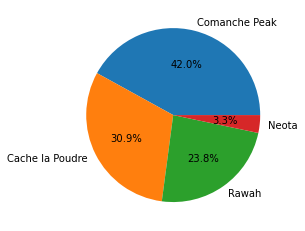

In [34]:
plt.pie(data["Wilderness"].value_counts(normalize=True),
        labels=data["Wilderness"].value_counts().index,
        autopct='%1.1f%%');


Распределение целевой переменной

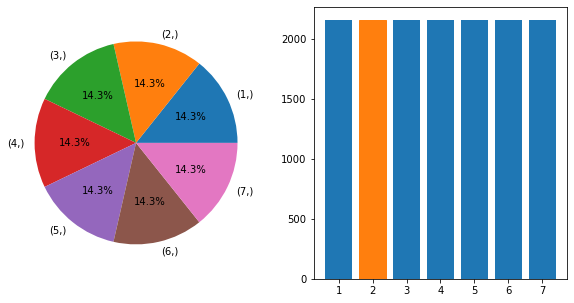

In [35]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(
        data[target_col].value_counts(normalize=True),
        labels=data[target_col].value_counts().index,
        autopct='%1.1f%%'
    );

bars = ax2.bar(["1", "2", "3", "4", "5", "6", "7"], data[target_col].value_counts())
bars[1].set_color('C1')

Таблица корелляций

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,0.016090
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,0.008015
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,0.087722
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,-0.010515
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,0.075647
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386,-0.105662
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144,-0.010286
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098,-0.098905
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162,-0.053399
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000,-0.089389


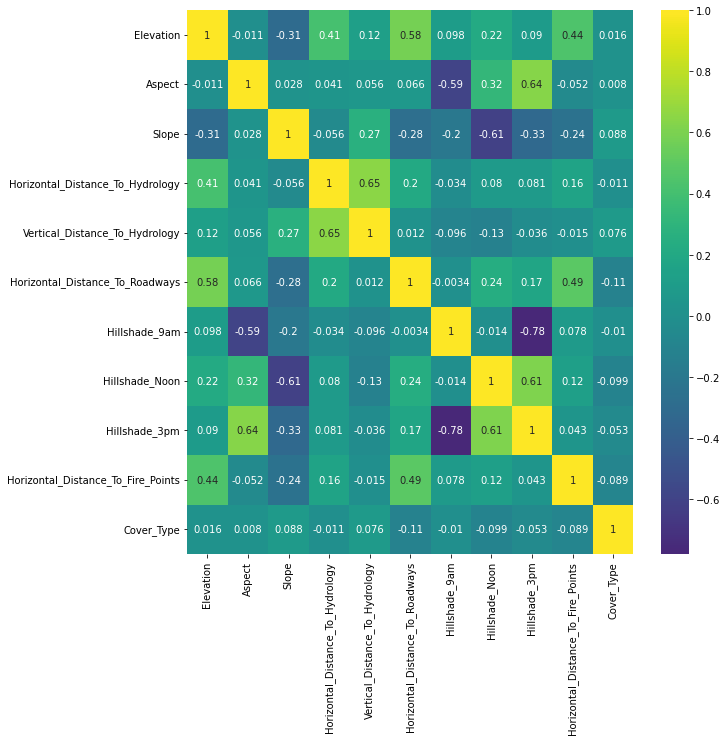

In [38]:
correlation_matrix = data.corr()
display(correlation_matrix)
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, center=0, annot=True, cmap="viridis");


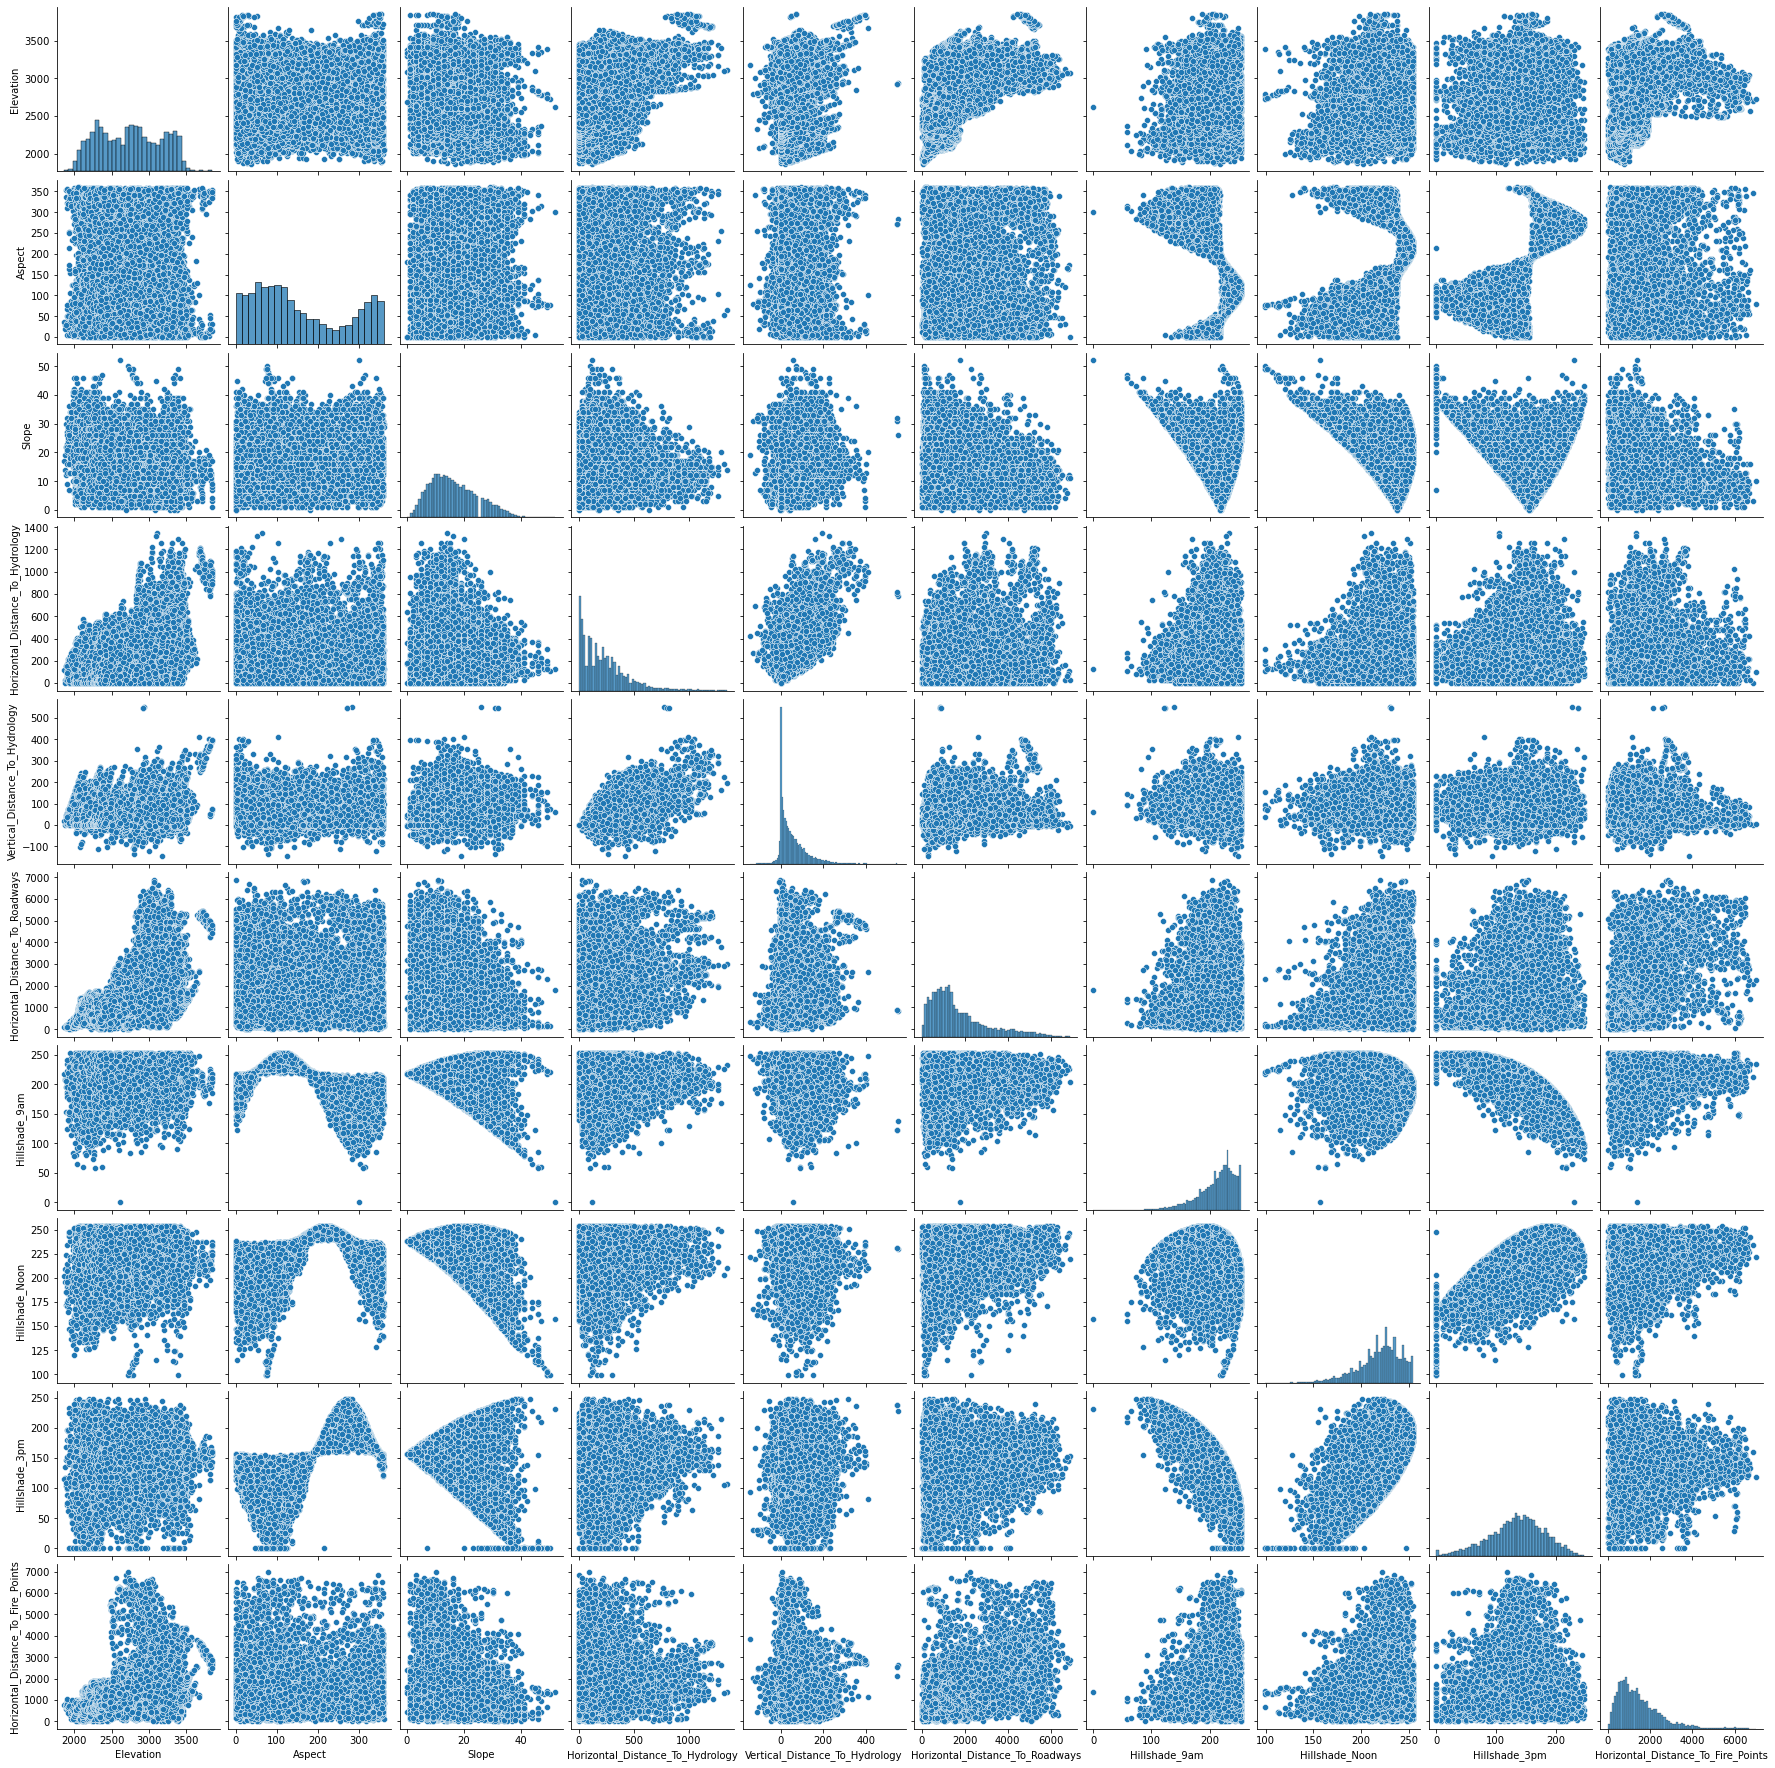

In [39]:
sns.pairplot(data[num_cols]);

Распределение целевой переменной в зависимости от Wilderness

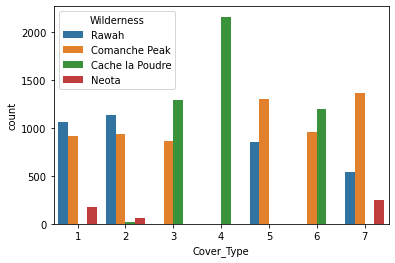

In [40]:
sns.countplot(x="Cover_Type", hue="Wilderness", data=data);

Распределения в зависимости от числовых переменных

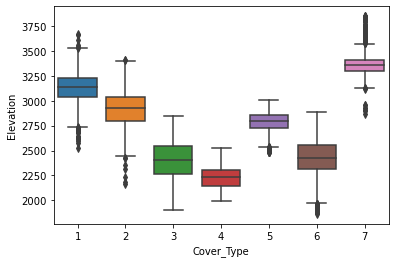

In [41]:
sns.boxplot(x="Cover_Type", y="Elevation", data=data);

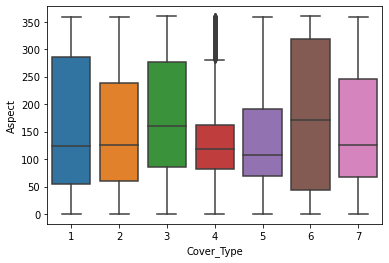

In [42]:
sns.boxplot(x="Cover_Type", y="Aspect", data=data);

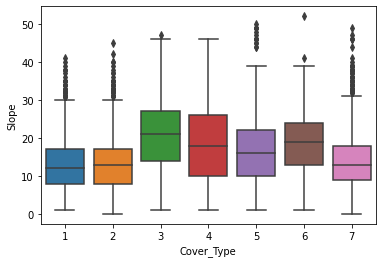

In [43]:
sns.boxplot(x="Cover_Type", y="Slope", data=data);

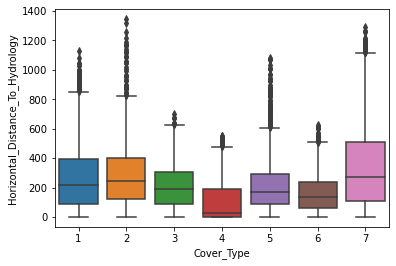

In [44]:
sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Hydrology", data=data);

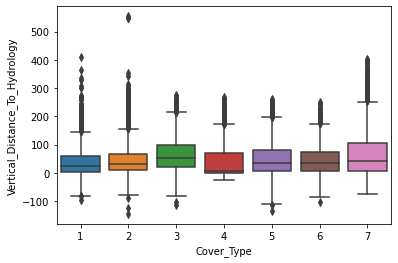

In [45]:
sns.boxplot(x="Cover_Type", y="Vertical_Distance_To_Hydrology", data=data);

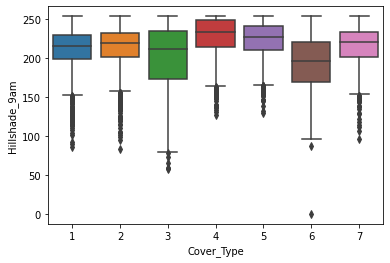

In [46]:
sns.boxplot(x="Cover_Type", y="Hillshade_9am", data=data);

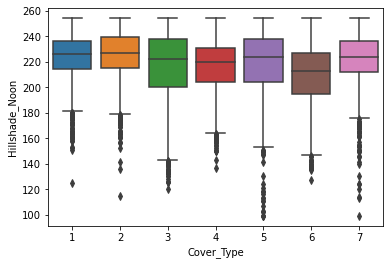

In [47]:
sns.boxplot(x="Cover_Type", y="Hillshade_Noon", data=data);

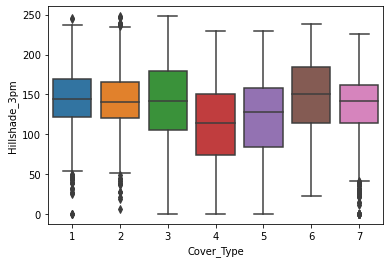

In [48]:
sns.boxplot(x="Cover_Type", y="Hillshade_3pm", data=data);

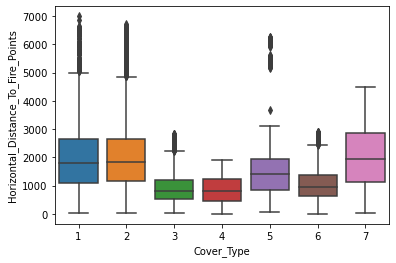

In [49]:
sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Fire_Points", data=data);

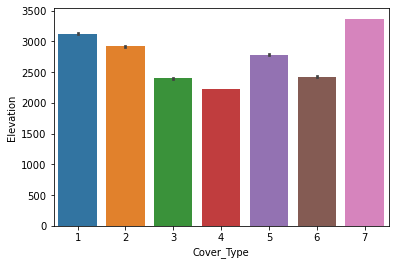

In [50]:
sns.barplot(x="Cover_Type", y="Elevation", data=data);

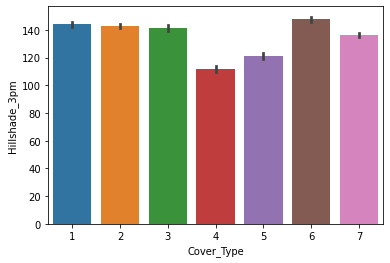

In [51]:
sns.barplot(x="Cover_Type", y="Hillshade_3pm", data=data);